In [1]:
import seaborn as sns

In [3]:
raw = (
    pd.read_clipboard()
    .rename(columns={"day of week": "dow"})
    .assign(
        date=lambda df: df.Date.astype("datetime64"),
        dow=lambda df: df.dow.replace(
            {
                k: v
                for k, v in zip(
                    range(1, 8), ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
                )
            }
        ),
    )
)

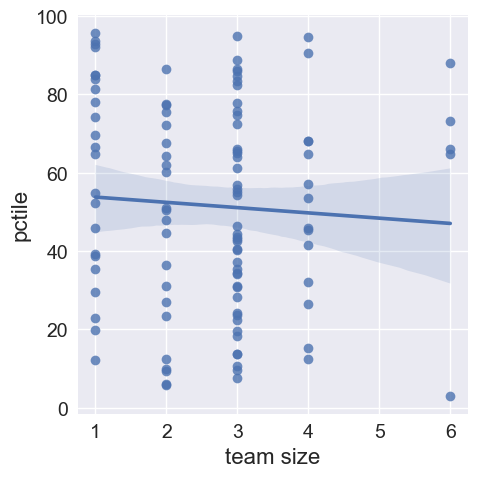

In [33]:
# fig, ax = plt.subplots(figsize=(10, 6))
fg = sns.lmplot(
    raw.loc[lambda df: df["team size"] != 5].astype({"team size": int}),
    x="team size",
    y="pctile",
)

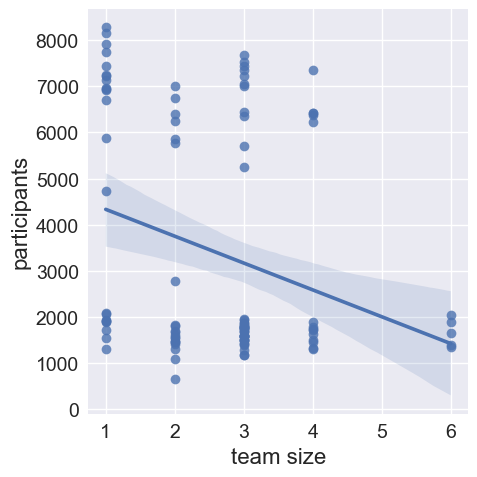

In [34]:
# fig, ax = plt.subplots(figsize=(10, 6))
fg = sns.lmplot(
    raw.loc[lambda df: df["team size"] != 5].astype({"team size": int}),
    x="team size",
    y="participants",
)

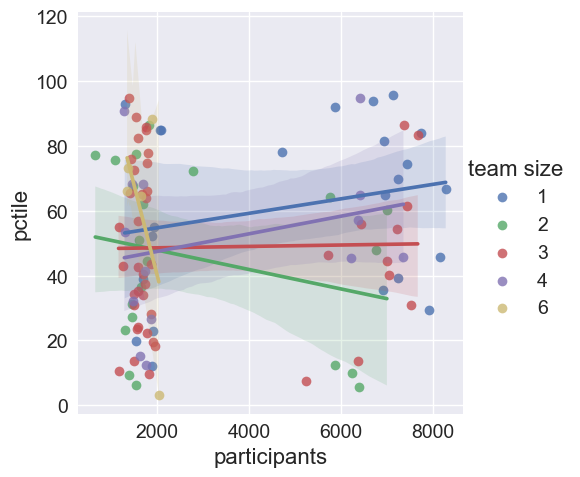

In [18]:
# fig, ax = plt.subplots(figsize=(10, 6))
fg = sns.lmplot(
    raw.loc[lambda df: df["team size"] != 5].astype({"team size": int}),
    x="participants",
    y="pctile",
    hue="team size",
)

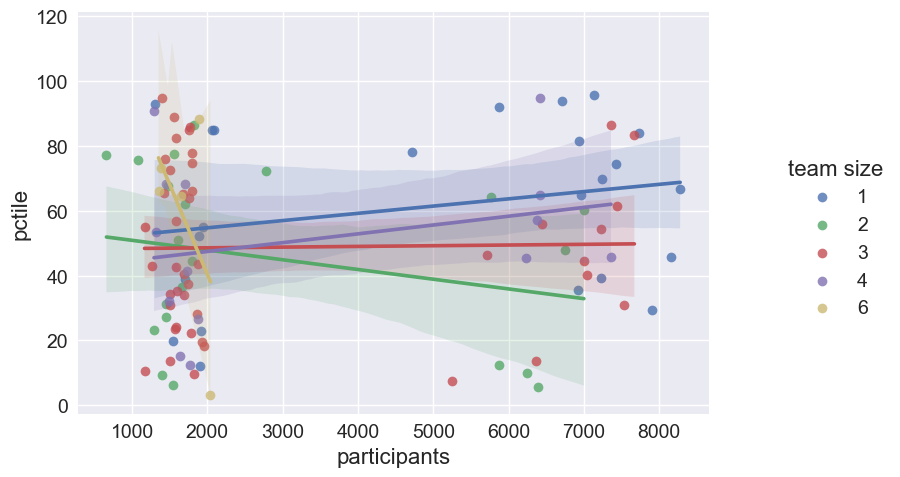

In [32]:
fg.figure.set_size_inches(10,5)
fg.figure

In [27]:
ax = fg.axes[0][0]


AttributeError: 'Axes' object has no attribute 'size'

<Axes: xlabel='score', ylabel='pctile'>

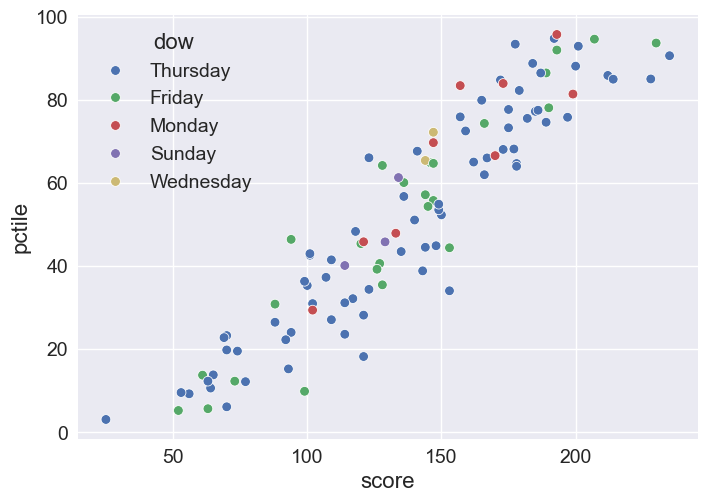

In [4]:
sns.scatterplot(
    data=raw,
    x="score",
    y="pctile",
    hue="dow",
)

<Axes: xlabel='pctile', ylabel='Density'>

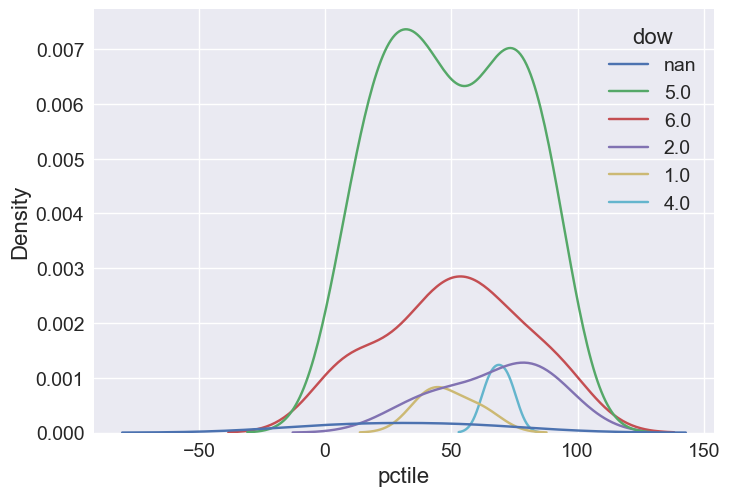

In [29]:
sns.kdeplot(raw.dropna(subset=['pctile','dow']),x='pctile',hue='dow')

[(0.0, 100.0), (100.0, 9000.0)]

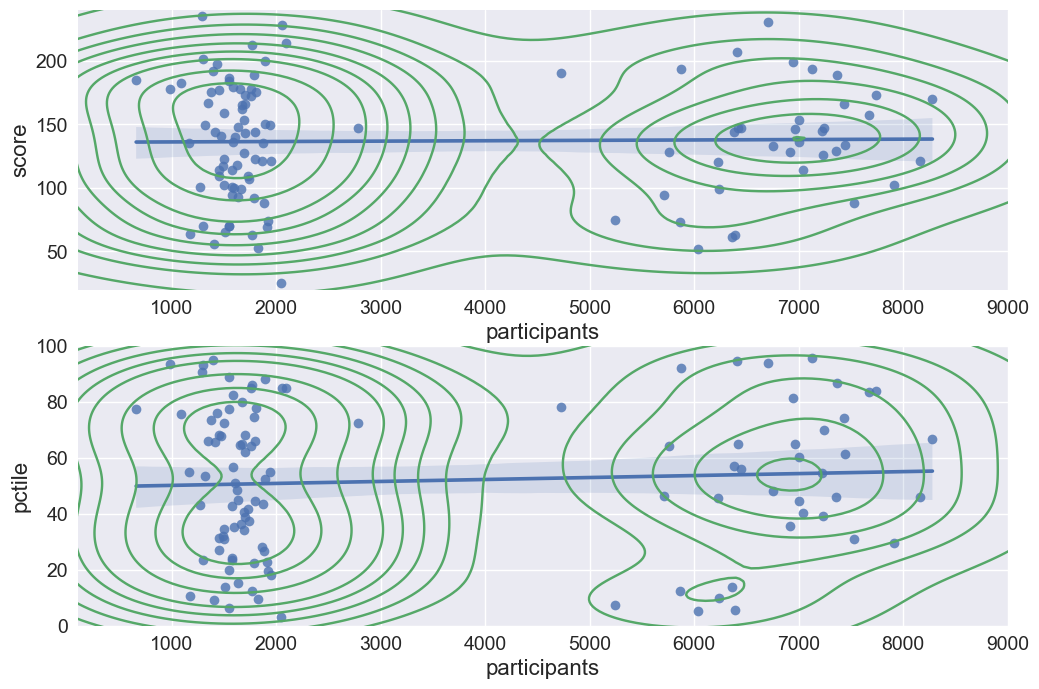

In [7]:
import pandas as pd
t = pd.read_clipboard().drop(columns=['Date'])

fig, ax = plt.subplots(2,1,figsize=(12,8))
sns.regplot(data=t,x='participants',y='score',ax=ax[0])
sns.kdeplot(data=t,x='participants',y='score',ax=ax[0])
ax[0].set(ylim=(20,240),xlim=(1e2,9e3))

sns.regplot(data=t,x='participants',y='pctile',ax=ax[1],)
sns.kdeplot(data=t,x='participants',y='pctile',ax=ax[1])

ax[1].set(ylim=(0,100),xlim=(1e2,9e3))


0       NaN
1       NaN
2       0.0
3      21.0
4      36.0
       ... 
994     NaN
995     NaN
996     NaN
997     NaN
998     NaN
Name: date, Length: 999, dtype: float64

[Text(0.5, 1.0, "first time it's looked plausible that performance is improving over time")]

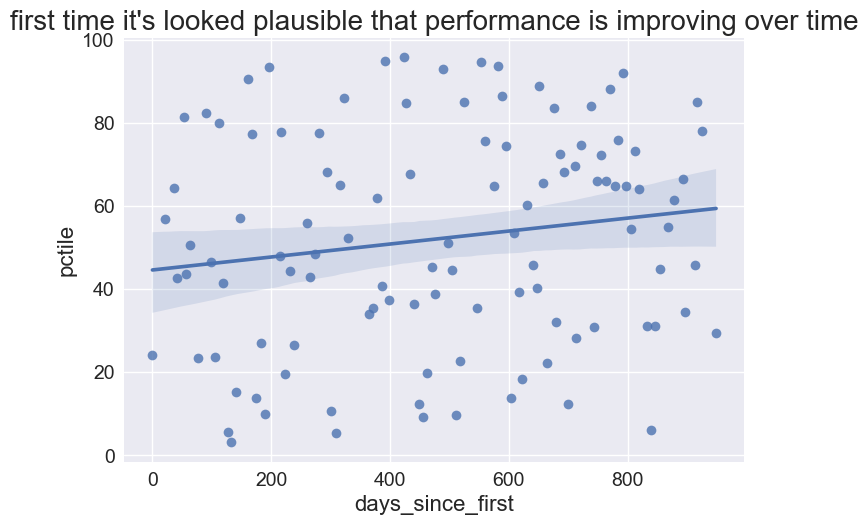

In [40]:
sns.regplot(raw.assign(days_since_first=(raw.date-raw.date.min()).dt.days),x='days_since_first',y='pctile')
plt.gca().set(title="first time it's looked plausible that performance is improving over time")

[Text(0.5, 1.0, "first time it's looked plausible that performance is improving over time")]

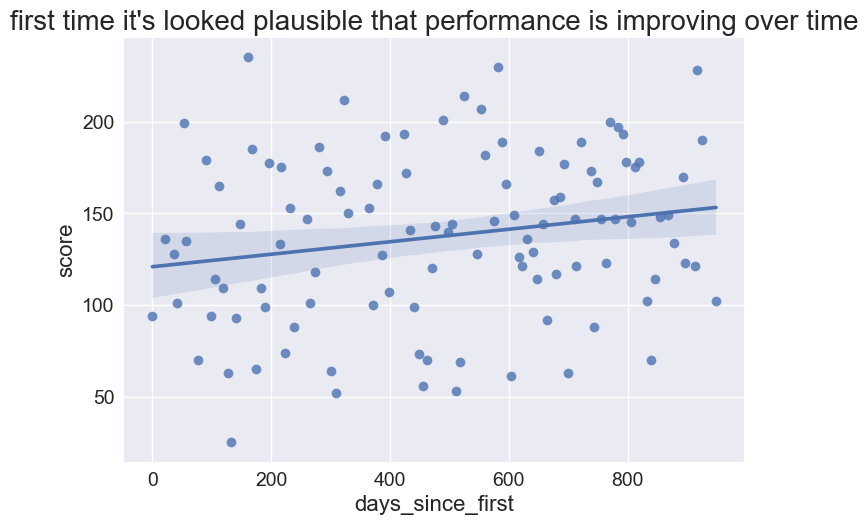

In [41]:
sns.regplot(raw.assign(days_since_first=(raw.date-raw.date.min()).dt.days),x='days_since_first',y='score')
plt.gca().set(title="first time it's looked plausible that performance is improving over time")